In [634]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit
import math

%matplotlib inline

In [664]:
#os.listdir()


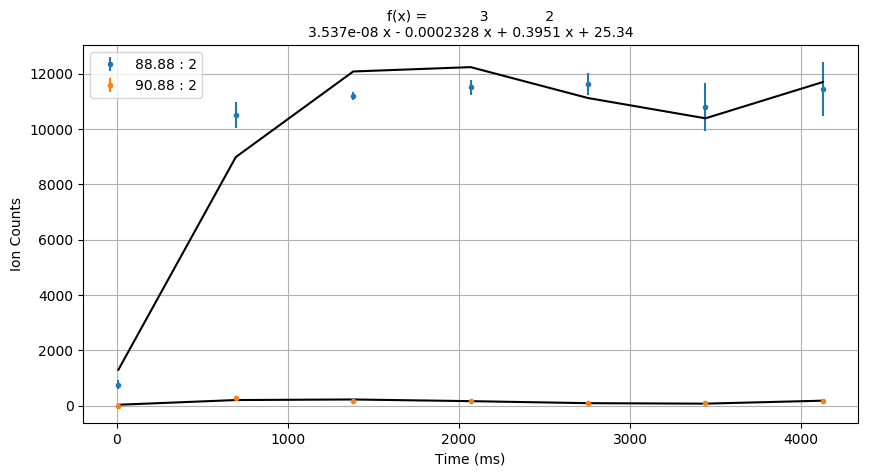

In [740]:
filename = "08_01_19-2.scan"
def func(x, a, b, c):
  #return a * np.exp(-b * x) + c
  return a * np.log(b * x) + c

f = open(filename)
no_of_mass = 0
start = False
raw_datas = []
iterations = []
time = []

for line in f:

    if line.find("#mass")>=0:
        no_of_mass += 1
        tmp = line.split(":")[-1].strip()
        iterations.append(int(tmp))

    if not line[0] == "#" and not line == "\n":

        if line.strip() == "ALL:":
            start = True

        if not start:
            tmp = line.split()
            time.append(tmp)

        if start and not line.strip()=="ALL:":
            raw_datas.append(line)

f.close()

time = [float(i) for i in list(zip(*(time)))[0]]

all_datas = [[float(j) for j in i.split()] for i in raw_datas]
data_run_cycle = int(len(all_datas)/sum(iterations))

datas = [[[] for j in range(iterations[i])] for i in range(no_of_mass)]

k = 0
for i in range(no_of_mass):
    for j in range(iterations[i]):
        d = data_run_cycle
        datas[i][j] = all_datas[k:d+k]
        k += d

mass_values = [i[0][0][0] for i in datas]
data_sets = [list(zip(*datas[i])) for i in range(no_of_mass)]

mass_mean_adder, mass_mean, m = [], [], []
varience, varience_collector1, varience_collector2 = [], [], []

for i in range(no_of_mass):
    for k in range(data_run_cycle):
        for j in range(iterations[i]):

            #mass counts
            m_tmp = data_sets[i][k][j][2]
            mass_mean_adder.append(m_tmp)

            #varience
            varience_adder = mass_mean_adder

        m.append(sum(mass_mean_adder)/len(mass_mean_adder))
        mass_mean_adder = []

        #varience
        for v in range(iterations[i]):

            if iterations[i]>1:

                v_tmp = (varience_adder[v]-m[k])**2
                varience_collector1.append(v_tmp)

        if iterations[i]>1:
            varience_collector2.append(sum(varience_collector1)/(len(varience_collector1)-1))
        else: varience_collector2.append(0)

        varience_collector1 = []

    #mass counts
    mass_mean.append(m)
    m = []

    #varience
    varience.append(varience_collector2)
    varience_collector2 = []

#standard deviation
standard_deviation = [[math.sqrt(i) for i in j] for j in varience]

#standard error
standard_error = [[i/math.sqrt(k) for i in j] for j, k in zip(standard_deviation, iterations)]

if len(time)<len(mass_mean[0]):
    for i in range(no_of_mass):
        del mass_mean[i][-1]
        del standard_error[i][-1]

plt.figure(figsize=(10,5), dpi = 100)
deg = 3
for i in range(no_of_mass):
    if iterations[i]>1:
        x, y, err = time, mass_mean[i], standard_error[i]
        lg = "{} : {}".format(mass_values[i], iterations[i])
        
        plt.errorbar(x, y, yerr = err, fmt = ".", label = lg )
        
        # polyfit
        
        z = np.polyfit(x, y, deg)
        p = np.poly1d(z)
        y_fit = [p(i) for i in x]
        
        plt.plot(x, y_fit, "k-")
        
        '''# log fit
        popt, pcov = curve_fit(func, x, y)

        #brutal force to avoid errors
        x = np.array(x, dtype=float) #transform your data in a numpy array of floats 
        y = np.array(y, dtype=float) #so the curve_fit can work
        
        yy = func(x, *popt)
        
        plt.plot(x, yy, 'r-', label = "log fit")'''

greek_letterz=[chr(code) for code in range(945,970)]
xs = greek_letterz[10]
plt.title("f(x) = {}".format(p),fontsize=10)

plt.grid(True)
plt.xlabel("Time (ms)")
plt.ylabel("Ion Counts")
plt.legend()
#plt.title(filename + ":  Polyfit of Order: %i"%deg)
plt.savefig(filename+".png")
#plt.tight_layout()
plt.show()
plt.close()

In [699]:
from scipy.optimize import curve_fit
from sympy import symbols, latex
import numpy as np

x, y, error = time, mass_mean[1], standard_error[1]

def func(x, a, b, c):
  #return a * np.exp(-b * x) + c
  return a * np.log(b * x) + c

popt, pcov = curve_fit(func, x, y)
xs = symbols('\lambda')    
tex = latex(func(xs,*popt)).replace('$', '')
plt.title(r'$f(\lambda)= %s$' %(tex),fontsize=16)

#brutal force to avoid errors
x = np.array(x, dtype=float) #transform your data in a numpy array of floats 
y = np.array(y, dtype=float) #so the curve_fit can work

yy = func(x, *popt)

plt.figure()

plt.errorbar(x,y, yerr = error, fmt = ".", label = "Orginal")
plt.plot(x, yy, 'r-', label="Fitted Curve")

plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


AttributeError: 'Mul' object has no attribute 'log'

In [709]:
xs = symbols("\lambda")
print(xs)

\lambda


In [742]:
import sym
sym.Symbols("\lambda")

AttributeError: module 'sym' has no attribute 'Symbols'

In [724]:
greek_letterz=[chr(code) for code in range(945,970)]
print(greek_letterz)
x = greek_letterz[10]
x

['α', 'β', 'γ', 'δ', 'ε', 'ζ', 'η', 'θ', 'ι', 'κ', 'λ', 'μ', 'ν', 'ξ', 'ο', 'π', 'ρ', 'ς', 'σ', 'τ', 'υ', 'φ', 'χ', 'ψ', 'ω']


'λ'

In [770]:
from sympy.utilities.lambdify import implemented_function
#from sympy import sqrt, sin, Matrix
#from sympy import Function
#from sympy.abc import w, x, y, z
x = ['1', '2']
#f = lambdify(x, float(x))
x = np.array(x, dtype = float)